# ML Experimentation

In [1]:
# Data manipulation and numerical operations
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# # Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and scaling
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn import preprocessing  # Import preprocessing separately

# Machine Learning - Train/test split
from sklearn.model_selection import train_test_split

# Pre-processing tools
from sklearn.preprocessing import StandardScaler #, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Importing linear regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, RANSACRegressor

# Importing non-linear regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.svm import SVR

# Classification models (if needed)
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree  # For Decision Trees

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# # Suppress warnings
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
INPUT_PATH = "airbnb_2022_2024_clean_encoded.csv"

In [3]:
# Define the path to the CSV file
df = pd.read_csv(INPUT_PATH, index_col="index")
print(df.shape)
df.head()

(25881, 18)


,host_identity_verified,instant_bookable,price,service_fee,minimum_nights,review_rate_number,boro_bronx,boro_brooklyn,boro_manhattan,boro_queens,boro_staten,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_entire,room_type_hotelr,room_type_privater,room_type_sharedr
index,,,,,,,,,,,,,,,,,,
0,True,False,142.0,28.0,30.0,4.0,False,False,True,False,False,False,True,False,True,False,False,False
5,True,True,1020.0,204.0,1.0,3.0,False,True,False,False,False,False,False,True,False,False,True,False
6,True,False,646.0,129.0,30.0,1.0,False,False,True,False,False,False,False,True,False,False,True,False
8,True,False,909.0,182.0,5.0,4.0,False,False,True,False,False,False,True,False,True,False,False,False
12,True,True,523.0,105.0,7.0,5.0,False,False,True,False,False,True,False,False,True,False,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25881 entries, 0 to 26256
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_identity_verified        25881 non-null  bool   
 1   instant_bookable              25881 non-null  bool   
 2   price                         25881 non-null  float64
 3   service_fee                   25881 non-null  float64
 4   minimum_nights                25881 non-null  float64
 5   review_rate_number            25881 non-null  float64
 6   boro_bronx                    25881 non-null  bool   
 7   boro_brooklyn                 25881 non-null  bool   
 8   boro_manhattan                25881 non-null  bool   
 9   boro_queens                   25881 non-null  bool   
 10  boro_staten                   25881 non-null  bool   
 11  cancellation_policy_flexible  25881 non-null  bool   
 12  cancellation_policy_moderate  25881 non-null  bool   
 13  cancel

# Scaler

In [5]:
# Defining the target variable
X = df.drop(columns=['price'])  
y = df['price']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 
#del X_train, X_test

# Regression
- **Predicting a continuous-valued attribute associated with an object.**
- https://scikit-learn.org/stable/index.html 

In [7]:
# List of models to test
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "BayesianRidge": BayesianRidge(),
    "HuberRegressor": HuberRegressor(),
    "RANSACRegressor": RANSACRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "SupportVectorRegressor": SVR(),
}

# Dictionary to hold model performance
mse_results = {}
trained_models = {}
mae_results = {}
rmse_results = {}
r2_results = {}

# Loop through each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...") 
   
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train_scaled)  # Predictions on training data
    y_pred_test = model.predict(X_test_scaled)    # Predictions on test data

    # Calculate metrics for training data
    mse_train = mean_squared_error(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)  
    r2_train = r2_score(y_train, y_pred_train)

    # Calculate metrics for test data
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)  
    r2_test = r2_score(y_test, y_pred_test)

    # Store results in dictionaries
    mse_results[model_name] = {'train': mse_train, 'test': mse_test}
    mae_results[model_name] = {'train': mae_train, 'test': mae_test}
    rmse_results[model_name] = {'train': rmse_train, 'test': rmse_test}
    r2_results[model_name] = {'train': r2_train, 'test': r2_test}
    trained_models[model_name] = model

# Prepare results for DataFrame
results_list = []

# Populate the list with model results
for model_name in mse_results.keys():
    results_list.append({
        'model_name': model_name,
        'mse_train': mse_results[model_name]['train'],
        'mse_test': mse_results[model_name]['test'],
        'mae_train': mae_results[model_name]['train'],
        'mae_test': mae_results[model_name]['test'],
        'rmse_train': rmse_results[model_name]['train'],
        'rmse_test': rmse_results[model_name]['test'],
        'r2_train': r2_results[model_name]['train'],
        'r2_test': r2_results[model_name]['test'],
    })

# Create the DataFrame
results_df = pd.DataFrame(results_list).sort_values(by='mse_test')
results_df

Evaluating LinearRegression...
Evaluating Ridge...
Evaluating Lasso...
Evaluating ElasticNet...
Evaluating BayesianRidge...
Evaluating HuberRegressor...
Evaluating RANSACRegressor...
Evaluating DecisionTreeRegressor...
Evaluating RandomForestRegressor...
Evaluating GradientBoostingRegressor...
Evaluating AdaBoostRegressor...
Evaluating KNeighborsRegressor...
Evaluating SupportVectorRegressor...


,model_name,mse_train,mse_test,mae_train,mae_test,rmse_train,rmse_test,r2_train,r2_test
4,BayesianRidge,2.023923,2.012806,1.215402,1.210860,1.422646,1.418734,0.999981,0.999982
6,RANSACRegressor,2.024072,2.012977,1.215194,1.210726,1.422699,1.418794,0.999981,0.999982
0,LinearRegression,2.024227,2.013122,1.215422,1.210981,1.422753,1.418845,0.999981,0.999982
1,Ridge,2.024178,2.014129,1.216942,1.212402,1.422736,1.419200,0.999981,0.999982
5,HuberRegressor,2.024412,2.014449,1.218235,1.214038,1.422819,1.419313,0.999981,0.999982
8,RandomForestRegressor,0.320031,2.145650,0.457254,1.214096,0.565713,1.464804,0.999997,0.999981
2,Lasso,3.025647,3.092090,1.439048,1.447748,1.739439,1.758434,0.999972,0.999972
7,DecisionTreeRegressor,0.042158,3.659707,0.033536,1.439283,0.205323,1.913036,1.000000,0.999967
9,GradientBoostingRegressor,5.657011,5.734523,1.901724,1.925597,2.378447,2.394686,0.999948,0.999948
10,AdaBoostRegressor,1715.267135,1721.812850,35.888086,35.936176,41.415784,41.494733,0.984316,0.984429


# Model Selection & Visualization of Predictions 

In [8]:
# Model Selection
best_model_name = results_df.iloc[0]['model_name']
print(f"The best model based on MSE is: {best_model_name}")
print(f"The best model based on MAE is: {best_model_name}")
print(f"The best model based on RMSE is: {best_model_name}")
print(f"The best model based on R2 is: {best_model_name}")

# Retrieve the best model
best_model = trained_models[best_model_name]
best_y_pred = best_model.predict(X_test_scaled)

The best model based on MSE is: BayesianRidge
The best model based on MAE is: BayesianRidge
The best model based on RMSE is: BayesianRidge
The best model based on R2 is: BayesianRidge


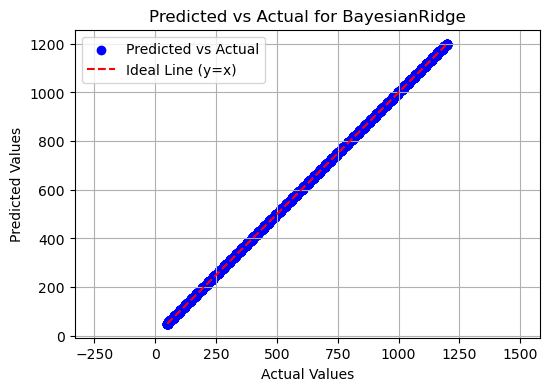

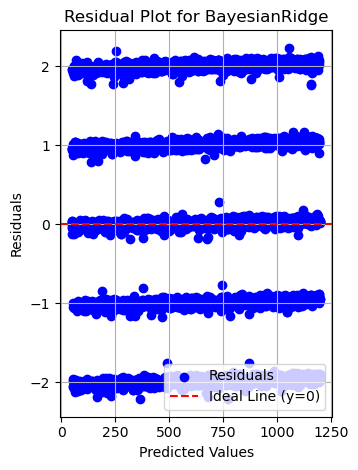

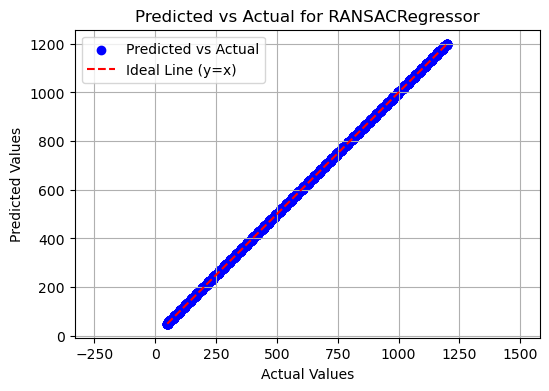

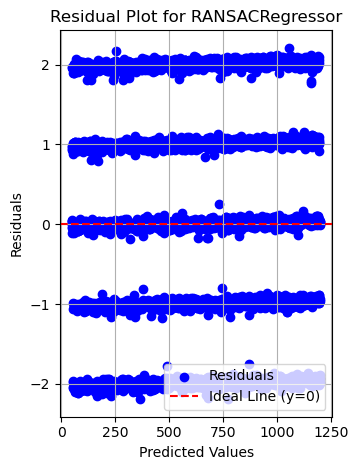

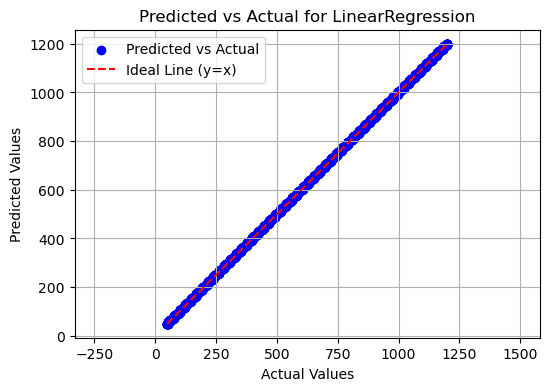

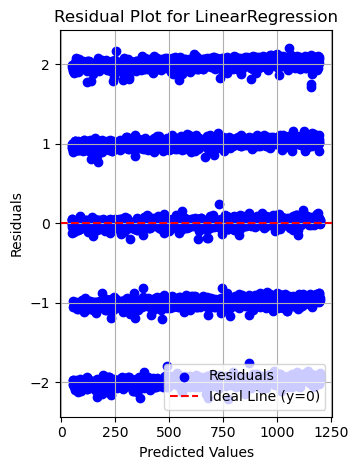

In [9]:
# Plotting predictions vs actual for the best 3 models based on MSE
top_models = results_df.head(3)

for index, row in top_models.iterrows():
    model_name = row['model_name']
    model = trained_models[model_name]
    
    # Make predictions with the model
    y_pred = model.predict(X_test_scaled)
    
    # Create the plot
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line (y=x)')
    plt.title(f'Predicted vs Actual for {model_name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')  # Equal scaling for both axes
    plt.show()

# Calculate residuals
    residuals = y_test - y_pred
    
    # Create the Residual Plot
    plt.subplot(1, 2, 2)  # Create a subplot for Residuals
    plt.scatter(y_pred, residuals, color='blue', label='Residuals')
    plt.axhline(y=0, color='red', linestyle='--', label='Ideal Line (y=0)')
    plt.title(f'Residual Plot for {model_name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [10]:
# Evaluate on the trained 
train_predictions = best_model.predict(X_train_scaled)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

print("Training Set Evaluation:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Mean Squared Error: {train_mse}")
print(f"R-squared: {train_r2}")

# Evaluate on the test set
test_predictions = best_model.predict(X_test_scaled)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("\nTest Set Evaluation:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Mean Squared Error: {test_mse}")
print(f"R-squared: {test_r2}")

Training Set Evaluation:
Mean Absolute Error: 1.2154024057603618
Mean Squared Error: 2.023922885400747
R-squared: 0.9999814933075519

Test Set Evaluation:
Mean Absolute Error: 1.2108597179785323
Mean Squared Error: 2.0128061814385974
R-squared: 0.9999817971928254


# Grid Search 

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV

# List of models and their hyperparameter grids
models = {
    "LinearRegression": (LinearRegression(), {}),
    "Ridge": (Ridge(), {'alpha': [0.1, 1.0, 10.0]}),
    "Lasso": (Lasso(), {'alpha': [0.1, 1.0, 10.0]}),
    "ElasticNet": (ElasticNet(), {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}),
    "BayesianRidge": (BayesianRidge(), {}),
    "HuberRegressor": (HuberRegressor(), {}),
    "DecisionTreeRegressor": (DecisionTreeRegressor(), {'max_depth': [None, 10, 20, 30]}),
    "RandomForestRegressor": (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}),
    "GradientBoostingRegressor": (GradientBoostingRegressor(), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}),
    "AdaBoostRegressor": (AdaBoostRegressor(), {'n_estimators': [50, 100]}),
    "KNeighborsRegressor": (KNeighborsRegressor(), {'n_neighbors': [3, 5, 10]}),
    "SupportVectorRegressor": (SVR(), {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2]})
}

# Dictionary to hold the best models and their performance
results = []

# Loop through each model and apply Grid Search
for model_name, (model, param_grid) in models.items():
    print(f"Evaluating {model_name}...")
    
    # Set up the Grid Search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
    
    # Fit the Grid Search to the training data
    grid_search.fit(X_train_scaled, y_train)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Mean Squared Error (MSE)': mse,
        'Mean Absolute Error (MAE)': mae,
        'Root Mean Squared Error (RMSE)': rmse,
        'R^2 Score': r2
    })

# Create a DataFrame for results
results_df = pd.DataFrame(results).sort_values(by='Mean Squared Error (MSE)')
print("\nModel Evaluation Results:")
print(results_df)

Evaluating LinearRegression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Evaluating Ridge...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Evaluating Lasso...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Evaluating ElasticNet...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Evaluating BayesianRidge...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Evaluating HuberRegressor...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Evaluating DecisionTreeRegressor...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Evaluating RandomForestRegressor...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Evaluating GradientBoostingRegressor...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Evaluating AdaBoostRegressor...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Evaluating KNeighborsRegressor...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Evaluating 

The best model is: BayesianRidge with parameters: {}
Final Evaluation Metrics for BayesianRidge:
MSE: 2.0128061814385974, MAE: 1.2108597179785323, RMSE: 1.4187340065842495, R²: 0.9999817971928254


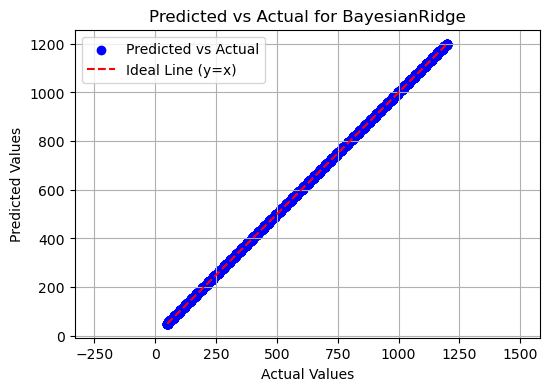

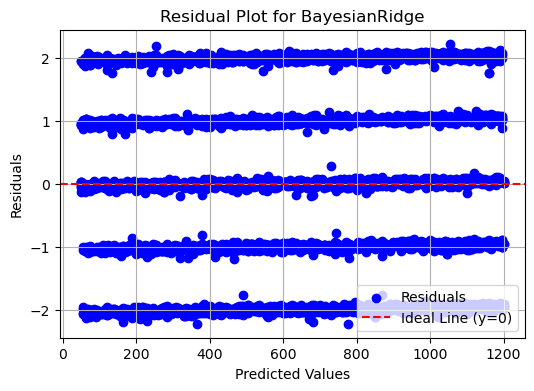

In [14]:
# Select the best model based on MSE
best_model_info = results_df.iloc[0]
best_model_name = best_model_info['Model']
best_params = best_model_info['Best Parameters']

print(f"The best model is: {best_model_name} with parameters: {best_params}")

# Final evaluation on the test set using the best model
best_model = models[best_model_name][0].set_params(**best_params)  # Set the best parameters
best_model.fit(X_train_scaled, y_train)  # Fit the model on the training data
y_pred = best_model.predict(X_test_scaled)  # Make predictions on the test set

# Calculate final metrics
final_mse = mean_squared_error(y_test, y_pred)
final_mae = mean_absolute_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, y_pred)

print(f"Final Evaluation Metrics for {best_model_name}:")
print(f"MSE: {final_mse}, MAE: {final_mae}, RMSE: {final_rmse}, R²: {final_r2}")

# Feature Importance for tree-based models
if best_model_name in ['RandomForestRegressor', 'DecisionTreeRegressor']:
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    print("Feature Importances:")
    print(feature_importance_df.sort_values(by='Importance', ascending=False))

# Visualization: Predictions vs Actual

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line (y=x)')
plt.title(f'Predicted vs Actual for {best_model_name}')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Equal scaling for both axes
plt.show()

# Visualization: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Ideal Line (y=0)')
plt.title(f'Residual Plot for {best_model_name}')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# Inference & Cross Validation

In [15]:
# Step 1: Inference function 
def make_inference(new_data):
    """
    Make predictions using the best model.
    new_data should be a DataFrame with the same structure as new_data_scaled.
    """
    # Ensure new_data has the same columns as the training data
    new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

    # Preprocess the new data (scaling)
    new_data_scaled = scaler.transform(new_data)

    # Make predictions using the best model 
    best_model = trained_models[min(rmse_results, key=rmse_results.get)]  
    predictions = best_model.predict(new_data_scaled)
    
    return predictions

In [16]:
# Required features check
required_features = X_train.columns.tolist()
print("Required features for inference:", required_features)

Required features for inference: ['host_identity_verified', 'instant_bookable', 'service_fee', 'minimum_nights', 'review_rate_number', 'boro_bronx', 'boro_brooklyn', 'boro_manhattan', 'boro_queens', 'boro_staten', 'cancellation_policy_flexible', 'cancellation_policy_moderate', 'cancellation_policy_strict', 'room_type_entire', 'room_type_hotelr', 'room_type_privater', 'room_type_sharedr']


In [17]:
# Example of new data (replace with required features)
new_data = pd.DataFrame({
    'host_identity_verified': [1],  
    'instant_bookable': [1],         
    'service_fee': [100],            
    'minimum_nights': [2],           
    'review_rate_number': [50],      
    'boro_bronx': [0],               
    'boro_brooklyn': [1],           
    'boro_manhattan': [0],           
    'boro_queens': [0],              
    'boro_staten': [0],             
    'cancellation_policy_flexible': [1], 
    'cancellation_policy_moderate': [0],   
    'cancellation_policy_strict': [0],      
    'room_type_entire': [0],         
    'room_type_hotelr': [1],         
    'room_type_privater': [0],       
    'room_type_sharedr': [0]         
})

# Ensure the new data is preprocessed the same way as X_train
# For example, if you used a scaler on X_train, apply the same scaler to new_data

# Uncomment and use the scaler if you applied scaling during training
new_data_scaled = scaler.transform(new_data)  # Apply scaling if necessary

# Make predictions on the new data using the best model
predictions = best_model.predict(new_data_scaled)  

# Output the predictions
print("Predictions for new data:", predictions)

Predictions for new data: [498.95961036]


In [ ]:
# Step 2: Evaluate Model Performance for Cross Validation 
y_val_pred = best_model.predict(X_test_scaled)  # X_val is your validation features

# Calculate metrics
val_mse = mean_squared_error(y_test, y_val_pred)  # y_val is your validation target
val_mae = mean_absolute_error(y_test, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_test, y_val_pred)

print("Validation Evaluation Metrics:")
print(f"MSE: {val_mse}, MAE: {val_mae}, RMSE: {val_rmse}, R²: {val_r2}")


In [18]:
# Step 3: Refine the Model
from sklearn.linear_model import Ridge
X_val = X_test_scaled
y_val = y_test

# Example of refining the model with new hyperparameters
refined_model = Ridge(alpha=1.0)  # Adjust alpha for Ridge regression
refined_model.fit(X_train_scaled, y_train)  # X_train and y_train should be defined

# Re-evaluate the refined model
y_refined_pred = refined_model.predict(X_val)

# Calculate metrics again
refined_val_mse = mean_squared_error(y_val, y_refined_pred)
refined_val_mae = mean_absolute_error(y_val, y_refined_pred)
refined_val_rmse = np.sqrt(refined_val_mse)
refined_val_r2 = r2_score(y_val, y_refined_pred)

print("Refined Model Evaluation Metrics:")
print(f"MSE: {refined_val_mse}, MAE: {refined_val_mae}, RMSE: {refined_val_rmse}, R²: {refined_val_r2}")


Refined Model Evaluation Metrics:
MSE: 2.0141291113098543, MAE: 1.212401990050635, RMSE: 1.4192001660477123, R²: 0.9999817852289128


In [19]:
# Step 4: Save the trained machine learning models to load using Pickle
import pickle

# Save the trained model to a file
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved successfully!")

# Load the trained model from the file
with open('trained_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use loaded_model to make predictions
predictions = loaded_model.predict(new_data_scaled)
predictions

Model saved successfully!


array([498.95961036])

# Step 5: Sample Code for Deploying the Model

```python
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Load the trained model
best_model = joblib.load('best_model.pkl')  # Ensure this is the correct path

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    new_data = pd.DataFrame(data, index=[0])  # Convert JSON to DataFrame
    predictions = best_model.predict(new_data)
    return jsonify(predictions.tolist())

if __name__ == "__main__":
    app.run(debug=True)


In [20]:
# Step 6: Monitor Model Performance
import logging

# Set up logging
logging.basicConfig(filename='model_performance.log', level=logging.INFO)

# Log predictions and actual values (assuming you have y_val for comparison)
logging.info(f"Predictions: {predictions}, Actual: {y_val}")
